In [27]:
## Math
import numpy as np

## Complex math
import cmath as cm

## nd.array deep copy
import copy

## Audio Playing
from IPython.display import Audio

## Wave file save
import scipy.io.wavfile as wavfile

## Visualization
%matplotlib inline
import matplotlib.pyplot as plt

In [28]:
def karplus_strong_naive(x, a, y_len):
    """
    Synthesizes a new waveform from an existing wavetable, modifies last sample by averaging.
    
    Parameters:
        x (list or nd.array) - initially generated signal
        a (float) - alpha
        M (int) - previous value of y
        y_len (int) - length of output signal
    
    Return:
        np.array - obtained y signal
    
    """
    x = copy.deepcopy(x)
    x_len = len(x)
    y = []
    for i in range(y_len):
        if i < x_len:
            y.insert(i, x[i])
        else:
            y.insert(i, a*y[i-x_len])
    return np.array(y)

In [29]:
def dtft(x, n):
    """
    Computes the discrete time Fourier transform (DTFT).
    Returns a function that is the DTFT of the given vector.
    Parameters
    ----------
    x :  array_like
        the 1-D vector to compute the DTFT upon
    n :  array_like
        the 1-D vector, indexes
    Returns
    -------
    X : graph of magnitude over main period [-pi, pi]
        a function of frequency as in X(f), corresponding to the DTFT of x
    """
    N = 1000 # number of points on graph
    j = cm.sqrt(-1)
    X = []
    
    w = np.linspace(-np.pi, np.pi, N)
    for i in range(0, N):
        w_tmp = w[i]
        X_tmp = 0
        
        for k in range(0, len(x)):
            X_tmp += x[k] * np.exp(-n[k] * w_tmp * j)
       
        X.append(abs(X_tmp))
    
    plt.plot(w,X)
    plt.xlabel('Frequencies')
    plt.ylabel('|X(e^jw)| Magnitude')
    plt.title('DTFT')
    plt.show()

In [30]:
M = 32
n = np.arange(M) # 0, 1, ... , 31
x = 2 * n / (M-1) - 1

# if we want ot generate [a, b] instead of [-1, 1], then 
# x_n = (b-a) * n / (M-1) + a

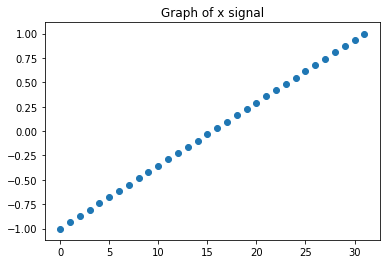

In [31]:
plt.scatter(n, x)
plt.title('Graph of x signal')
plt.show();

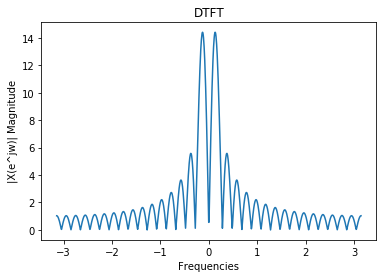

In [32]:
dtft(x, n)

In [33]:
y = karplus_strong_naive(x, a = 0.9, y_len = 32000)

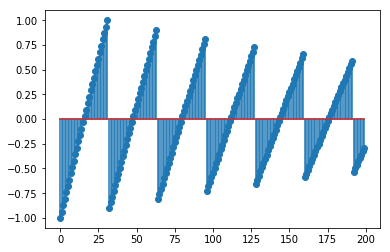

In [34]:
plt.stem(y[0:200]);

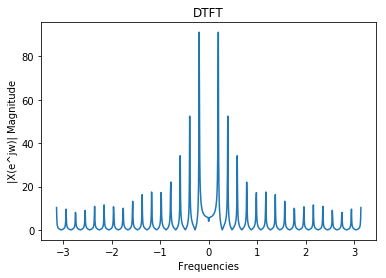

In [36]:
dtft(y, np.arange(32000))

In [53]:
M = 8
n = np.arange(M) # 0, 1, ... , 31
x = 2 * n / (M-1) - 1

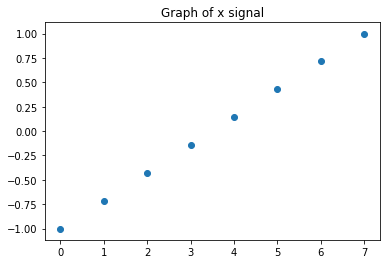

In [54]:
plt.scatter(n, x)
plt.title('Graph of x signal')
plt.show();

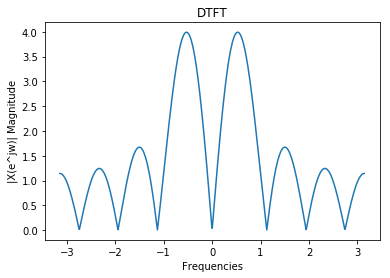

In [55]:
dtft(x, n)

In [56]:
y = karplus_strong_naive(x, a = 0.9, y_len = 32000)

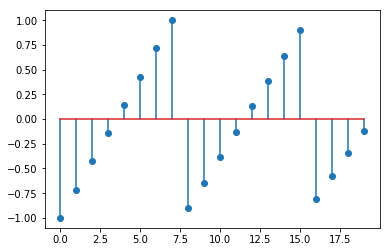

In [57]:
plt.stem(y[0:20]);

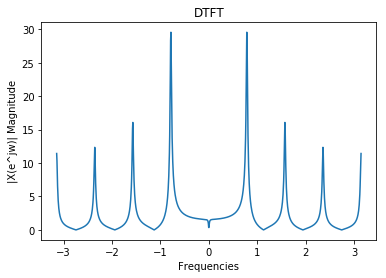

In [58]:
dtft(y, np.arange(32000))

In [39]:
x_new = np.random.randint(1, 10, 50).astype(np.float)

In [43]:
y_new = karplus_strong_naive(x_new, a = 0.99, y_len = 32000)

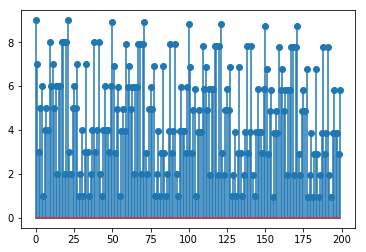

In [44]:
plt.stem(y_new[0:200]);

In [45]:
Audio(y_new, rate=16000)